In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("CUDA is not available.")


CUDA is available!
Number of GPUs: 1
Current GPU: NVIDIA GeForce RTX 2050


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 

In [3]:
from ultralytics import YOLO
# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

In [4]:
# Display model information 
model.info()

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [5]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

100%|██████████| 49.2k/49.2k [00:00<00:00, 1.27MB/s]


image 1/1 c:\Users\amren\OneDrive\Desktop\College-Project\AI-model\Model\zidane.jpg: 384x640 2 persons, 1 tie, 98.7ms
Speed: 8.3ms preprocess, 98.7ms inference, 253.8ms postprocess per image at shape (1, 3, 384, 640)


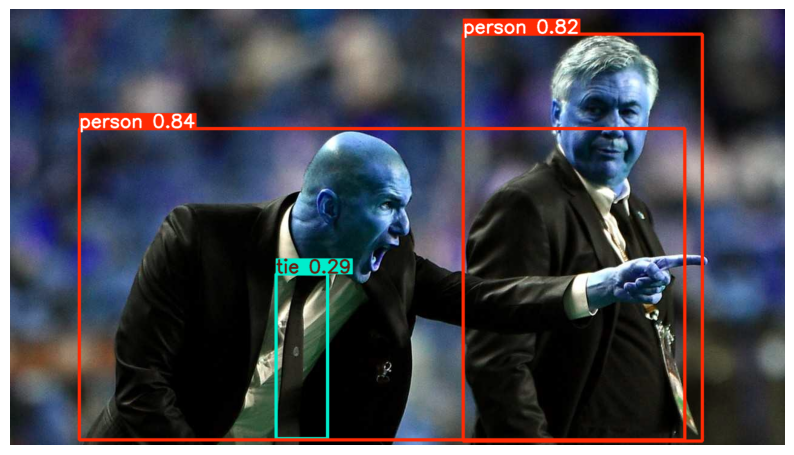

In [6]:
# Load an image 
img = "https://ultralytics.com/images/zidane.jpg"

# Perform inference
result = model.predict(img, save=False, show=False)  # Run prediction without saving or showing

# Render the result (returns an annotated image as a NumPy array)
annotated_image = result[0].plot()

# Visualize the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()

In [6]:
import torch
import ultralytics
print(torch.__version__)
print(ultralytics.__version__)


2.5.1+cu121
8.3.54


In [7]:
!nvidia-smi


Sat Jan 11 11:15:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8              5W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

100%|██████████| 134k/134k [00:00<00:00, 7.72MB/s]


image 1/1 c:\Users\amren\OneDrive\Desktop\College-Project\AI-model\Model\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 122.9ms
Speed: 7.3ms preprocess, 122.9ms inference, 171.1ms postprocess per image at shape (1, 3, 640, 480)


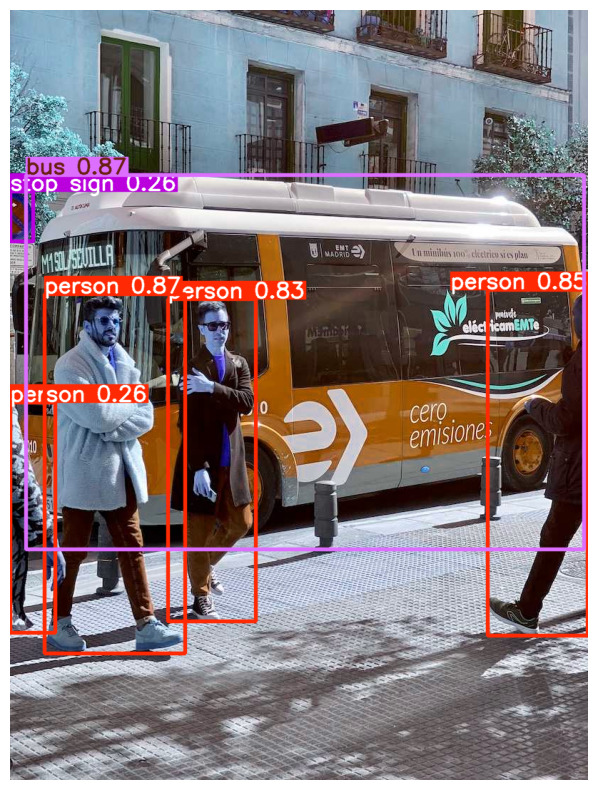

In [8]:
# Load an image 
img = "https://ultralytics.com/images/bus.jpg"

# Perform inference
result = model.predict(img, save=False, show=False)  # Run prediction without saving or showing

# Render the result (returns an annotated image as a NumPy array)
annotated_image = result[0].plot()

# Visualize the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


Found https://upload.wikimedia.org/wikipedia/commons/e/e4/Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg locally at Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg
image 1/1 c:\Users\amren\OneDrive\Desktop\College-Project\AI-model\Object-Detection\Model\Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg: 448x640 38 cars, 6 trucks, 124.7ms
Speed: 7.8ms preprocess, 124.7ms inference, 15.4ms postprocess per image at shape (1, 3, 448, 640)


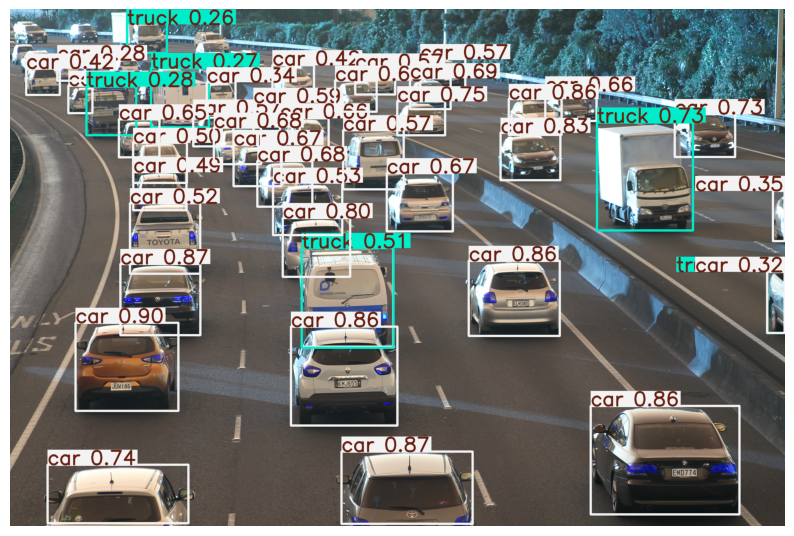

In [9]:
# Load an image 
img = "https://upload.wikimedia.org/wikipedia/commons/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg"

# Perform inference
result = model.predict(img, save=False, show=False)  # Run prediction without saving or showing

# Render the result (returns an annotated image as a NumPy array)
annotated_image = result[0].plot()

# Visualize the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()

In [11]:
# Start video capture
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # Cut down frame to 250x250px
    #frame = frame[120:120+250,200:200+250, :]
    
    if not ret:
        break

    # Make detection
    results = model(frame, verbose=False)  # Get predictions

    # Process each detection in results
    for result in results:
        # Draw bounding boxes on the frame
        annotated_frame = result.plot()  # `plot` adds annotations to the frame

    # Display the annotated frame
    cv2.imshow('YOLO', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

#### Data Preparation

In [10]:
import uuid  #Unique Identifier
import os
import time

In [4]:
IMAGES_PATH = os.path.join('Data', 'images')
labels = ['positive']
number_imgs = 200

In [12]:
import os
import cv2
import uuid
import time

# Define the path to save images
IMAGES_PATH = os.path.join('Data', 'images')
labels = ['positive']
number_imgs = 200

# Ensure the directory exists
os.makedirs(IMAGES_PATH, exist_ok=True)

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    print("Press 'a' to capture an image, or 'q' to quit.")
    time.sleep(2)  # Short delay before starting

    captured_images = 0

    while captured_images < number_imgs:
        # Capture frame from webcam
        ret, frame = cap.read()

        if not ret:
            print("Failed to capture frame. Exiting.")
            break

        # Render the frame to the screen
        cv2.imshow('Collecting images', frame)

        # Wait for key press
        key = cv2.waitKey(1) & 0xFF

        if key == ord('a'):
            # Generate unique image name
            img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')

            # Save the captured frame
            cv2.imwrite(img_name, frame)
            print(f'Image {captured_images + 1} saved as {img_name}')

            captured_images += 1

        elif key == ord('q'):
            print("Exiting...")
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


Press 'a' to capture an image, or 'q' to quit.
Exiting...


In [13]:
import os
import cv2
import uuid
import time

# Define the path to save images
IMAGES_PATH = os.path.join('Data', 'images-neg')
labels = ['negative']
number_imgs = 200

# Ensure the directory exists
os.makedirs(IMAGES_PATH, exist_ok=True)

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    print("Press 'a' to capture an image, or 'q' to quit.")
    time.sleep(2)  # Short delay before starting

    captured_images = 0

    while captured_images < number_imgs:
        # Capture frame from webcam
        ret, frame = cap.read()

        if not ret:
            print("Failed to capture frame. Exiting.")
            break

        # Render the frame to the screen
        cv2.imshow('Collecting images', frame)

        # Wait for key press
        key = cv2.waitKey(1) & 0xFF

        if key == ord('a'):
            # Generate unique image name
            img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')

            # Save the captured frame
            cv2.imwrite(img_name, frame)
            print(f'Image {captured_images + 1} saved as {img_name}')

            captured_images += 1

        elif key == ord('q'):
            print("Exiting...")
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


Press 'a' to capture an image, or 'q' to quit.
Exiting...


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:01<00:00, 4.10MB/s]


In [1]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [2]:
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
!pip show ultralytics

Name: ultralytics
Version: 8.3.54
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: c:\users\amren\anaconda3\envs\pytorch_env\lib\site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


#### Model Training

In [7]:
from ultralytics import YOLO

# Load YOLOv8 model

model = YOLO("yolov8n.pt")

model.train(data="data.yaml", epochs=100)

New https://pypi.org/project/ultralytics/8.3.55 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.54  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning C:\Users\amren\OneDrive\Desktop\College-Project\AI-model\Model\data\train\labels.cache... 192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<?, ?it/s]
val: Scanning C:\Users\amren\OneDrive\Desktop\College-Project\AI-model\Model\data\valid\labels.cache... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<?, ?it/s]


Plotting labels to C:\Users\amren\PycharmProjects\Object-detection-project\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\amren\PycharmProjects\Object-detection-project\runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.35G      1.706       4.43      1.797         74        640: 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]

                   all         84        214          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.45G      1.345      4.047      1.524         72        640: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]

                   all         84        214          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.45G      1.263      3.417      1.463         65        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

                   all         84        214     0.0805      0.167      0.166       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.45G      1.217      2.828      1.441         75        640: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         84        214      0.401      0.382      0.394      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.45G      1.177      2.388      1.396         70        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]

                   all         84        214      0.257      0.544      0.421      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.43G      1.124      2.035      1.364         63        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

                   all         84        214      0.368      0.476      0.501       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.45G       1.15      1.948      1.392         86        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        214      0.831      0.251      0.428      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.45G      1.151      1.848      1.385         70        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         84        214      0.805      0.334      0.469      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.45G      1.136      1.759      1.358         97        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]

                   all         84        214       0.77      0.342      0.471      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.45G      1.117       1.63      1.331         66        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         84        214      0.765      0.347      0.534      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.45G      1.091      1.556      1.341         61        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         84        214      0.735      0.452      0.561      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.45G      1.107      1.537      1.322         48        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        214        0.7      0.493      0.575      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.45G      1.078      1.478      1.294         79        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         84        214      0.746       0.45      0.604      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.45G       1.04      1.441      1.303         77        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]

                   all         84        214      0.681       0.49      0.596      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.45G      1.062      1.448      1.317         75        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         84        214      0.727      0.476       0.61      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.45G      1.046      1.383      1.284         79        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]

                   all         84        214      0.734       0.52      0.594      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.46G      1.042      1.384      1.284         59        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         84        214      0.723      0.531      0.601      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.45G      1.007       1.31      1.248         83        640: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]

                   all         84        214      0.726      0.561      0.634      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.44G     0.9869      1.351       1.25         80        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         84        214      0.701      0.539      0.646      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.45G     0.9745      1.265      1.223         96        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         84        214      0.798      0.503      0.665      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.45G     0.9921       1.27      1.219         79        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         84        214      0.691      0.596      0.687      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.46G     0.9613      1.197      1.215         74        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]

                   all         84        214      0.668      0.649      0.703      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.45G     0.9376      1.175      1.214         69        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         84        214       0.77      0.587      0.703      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.45G      0.925      1.222      1.198         64        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         84        214      0.724      0.568      0.675      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.45G     0.9442      1.161      1.177         79        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        214      0.748       0.56      0.667      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.45G     0.9796      1.143      1.215        102        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

                   all         84        214      0.918      0.577      0.667      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.45G     0.9425      1.151      1.198         84        640: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         84        214      0.925      0.577      0.666      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.44G      0.932      1.181      1.188         73        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]

                   all         84        214      0.898      0.586      0.652      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.44G     0.9348      1.145      1.202         84        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         84        214      0.883      0.604      0.669      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.45G     0.8928      1.108      1.172         89        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]

                   all         84        214      0.896      0.581      0.666      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.45G     0.9131      1.111      1.187         77        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]

                   all         84        214      0.713      0.597      0.654      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.45G      0.922       1.08      1.167         63        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]

                   all         84        214      0.716      0.572      0.655      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.44G     0.9116      1.091      1.181         62        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         84        214      0.724      0.582      0.656      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.45G     0.8714       1.04      1.141         65        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]

                   all         84        214      0.687      0.585      0.649      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.45G     0.8569     0.9993      1.135         89        640: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        214      0.692      0.557      0.628      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.43G     0.8441      1.024      1.131         80        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]


                   all         84        214      0.664      0.592      0.612      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.47G     0.8728       1.01      1.149         74        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         84        214      0.689      0.567      0.622      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.45G     0.8668      1.002      1.145         62        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         84        214       0.66      0.571      0.616      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.45G     0.8358     0.9821      1.136         55        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

                   all         84        214      0.589      0.603      0.635      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.45G     0.8352     0.9744      1.126         78        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         84        214      0.724      0.605      0.659      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.45G     0.8578     0.9836       1.14         75        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         84        214      0.751      0.557      0.654      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.45G     0.8368     0.9631      1.143         58        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]

                   all         84        214      0.726      0.562      0.644       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.45G     0.8393      0.937       1.12         76        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]

                   all         84        214      0.717      0.574      0.641      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.44G     0.8562     0.9812      1.141         61        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

                   all         84        214      0.714      0.592      0.639      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.45G     0.8466     0.9676      1.118         66        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         84        214      0.737      0.571      0.667      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.44G     0.8275     0.9296      1.111         68        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]

                   all         84        214      0.638      0.645      0.687      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.45G     0.8186     0.9288      1.115         62        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        214      0.705      0.637      0.707      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.44G     0.8754     0.9583      1.163         82        640: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        214      0.717      0.611      0.707      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.45G     0.8402     0.9429      1.127         68        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        214      0.748      0.594      0.699      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.45G     0.8424     0.9206        1.1         90        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        214      0.759      0.556      0.693      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.45G     0.7702     0.8869      1.096         77        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

                   all         84        214      0.766      0.547      0.699      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.45G     0.7806     0.8703      1.079         61        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         84        214      0.799      0.538        0.7       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.45G     0.7781     0.8425      1.097         86        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         84        214      0.799      0.542      0.708      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.45G     0.7762     0.8672      1.087         77        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         84        214      0.777      0.553      0.694      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.45G     0.7748     0.8619      1.093         72        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         84        214      0.702      0.633      0.682      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.45G     0.7555     0.8333      1.076         90        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]

                   all         84        214      0.633      0.611      0.666      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.45G     0.7612     0.8235      1.074         80        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]

                   all         84        214      0.635      0.605       0.66      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.44G     0.7807     0.8368      1.095         80        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         84        214       0.64      0.636      0.675       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.45G     0.7824       0.84      1.093         81        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]

                   all         84        214      0.653      0.645      0.681      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.45G     0.7616      0.841      1.082         70        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         84        214      0.665      0.654      0.686      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.45G     0.7574      0.803      1.071         82        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         84        214      0.657       0.63      0.689      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.45G     0.7713      0.821       1.08         95        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         84        214      0.662      0.615      0.691      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.45G     0.7647     0.8086      1.061         83        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         84        214      0.681      0.645      0.685      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.45G     0.7532     0.7933       1.06         77        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         84        214      0.638      0.638      0.673      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.45G     0.7421     0.8091       1.06         71        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]

                   all         84        214      0.621      0.616      0.662      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.45G     0.7538     0.8192      1.074         58        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]

                   all         84        214      0.771      0.564      0.673      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.45G     0.7309      0.803      1.067         76        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         84        214       0.76      0.561      0.686      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.45G     0.7425     0.8332      1.066         66        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]

                   all         84        214       0.66      0.625      0.692      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.45G     0.7639     0.8033      1.064         92        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]

                   all         84        214      0.667      0.637      0.697      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.46G     0.7713     0.7954      1.077         80        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         84        214      0.664      0.641      0.695      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.44G     0.7323     0.7944      1.073         83        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         84        214      0.669      0.639      0.691      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.45G     0.7247     0.7606      1.049         68        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         84        214      0.671       0.63      0.689      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.48G     0.7065     0.7584      1.061         78        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         84        214      0.682      0.633      0.683      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.45G     0.7693     0.7836      1.074         73        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         84        214      0.666      0.633      0.679      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.44G     0.7077     0.8015      1.058         71        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         84        214      0.642      0.642      0.681      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.45G     0.7251      0.757      1.069        101        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         84        214       0.77      0.556      0.684       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.45G      0.713     0.7464      1.058         59        640: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]

                   all         84        214      0.645      0.651      0.681      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.45G     0.7064     0.7501      1.043         85        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         84        214      0.633      0.648      0.682      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.45G     0.7344     0.7691      1.067         71        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]

                   all         84        214      0.637      0.648      0.682      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.45G     0.7129     0.7629      1.055         76        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        214      0.646      0.651      0.683      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.45G     0.6926      0.739      1.036         81        640: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]

                   all         84        214      0.632      0.649      0.673      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.44G      0.722     0.7346      1.062         66        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         84        214      0.646       0.65       0.67      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.45G     0.7036     0.7344      1.043         60        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         84        214       0.64      0.648      0.668      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.45G     0.7024     0.7447      1.038         82        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]

                   all         84        214      0.652      0.641      0.675      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.44G     0.6902     0.7427      1.044         95        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        214      0.643      0.636       0.66      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.45G     0.6963     0.7193      1.038         67        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         84        214      0.645      0.636      0.664      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.47G     0.7124     0.7742      1.061         73        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         84        214      0.672      0.648      0.677      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.45G     0.6775     0.7252       1.05         84        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         84        214      0.662      0.652      0.679      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.45G     0.6734     0.7109      1.035         58        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        214      0.664      0.651      0.681      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.45G     0.6971     0.7065      1.031         89        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         84        214      0.663      0.649      0.684      0.365


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.43G     0.6791     0.8326       1.05         37        640: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         84        214      0.661      0.637      0.683      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.43G      0.652     0.8248       1.04         39        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         84        214      0.633      0.634      0.676      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.43G       0.65     0.7939      1.028         41        640: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        214      0.631      0.636      0.676      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.43G     0.6578     0.8379      1.048         32        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         84        214      0.635      0.636      0.674      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.43G     0.6532     0.7962       1.05         37        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         84        214      0.642      0.639      0.675      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.43G     0.6166     0.7849      1.028         41        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

                   all         84        214      0.628       0.63      0.673      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.43G     0.6046     0.7537      0.987         39        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        214      0.631       0.63      0.672      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.43G     0.6026      0.767      1.015         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]

                   all         84        214      0.637       0.63      0.671      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.43G     0.6169     0.7651      1.021         40        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]

                   all         84        214      0.625      0.632      0.672      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.43G     0.6179      0.774      1.006         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         84        214       0.63      0.634      0.671      0.366



100 epochs completed in 0.124 hours.
Optimizer stripped from C:\Users\amren\PycharmProjects\Object-detection-project\runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\amren\PycharmProjects\Object-detection-project\runs\detect\train\weights\best.pt, 6.3MB

Validating C:\Users\amren\PycharmProjects\Object-detection-project\runs\detect\train\weights\best.pt...
Ultralytics 8.3.54  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 168 layers, 3,010,328 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]


                   all         84        214      0.801      0.542      0.708      0.399
                person         84         86      0.998          1      0.995      0.659
           rough-sheet          7          7          0          0    0.00789    0.00112
                  copy         42         42          1      0.816      0.974      0.624
                   pen         19         19       0.82      0.684      0.865      0.523
               earbuds         37         40          1          0      0.586      0.196
                mobile         20         20      0.989       0.75      0.821      0.392
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to C:\Users\amren\PycharmProjects\Object-detection-project\runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1, 17, 20, 21, 22, 23])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002428B2EADD0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047

#### Model Testing

In [10]:
from ultralytics import YOLO

# Load a custom YOLOv8 model
model = YOLO('runs/detect/train/weights/best.pt')


In [25]:
import cv2
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('runs/detect/train/weights/best.pt')

# Open the webcam (use 0 for the default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Set webcam resolution (optional)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

try:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Perform inference on the frame
        results = model(frame)

        # Annotate the frame with detections
        annotated_frame = frame  # Default to original frame in case of issues
        for result in results:
            annotated_frame = result.plot()

        # Display the annotated frame
        cv2.imshow('YOLOv8 - Webcam', annotated_frame)

        # Exit the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Exiting...")
            break

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Release resources
    cap.release()
    cv2.destroyAllWindows()



0: 480x640 1 person, 15.6ms
Speed: 7.5ms preprocess, 15.6ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 8.9ms
Speed: 3.3ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 5.7ms
Speed: 1.5ms preprocess, 5.7ms inference, 8.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 14.3ms
Speed: 0.0ms preprocess, 14.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 5.4ms
Speed: 0.0ms preprocess, 5.4ms inference, 6.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0